In [8]:
import scipy.sparse as sp
import networkx as nx
import numpy as np
import gurobipy as gp
from gurobipy import GRB

In [5]:
# Graph adjacency matrix (upper triangular) as a sparse matrix.
G = nx.cubical_graph()
adjacency_matrix = sp.triu(nx.to_scipy_sparse_array(G))
# Vertex weights
weights = np.array([2**i for i in range(8)])

In [6]:
print("Vertices:" ,G.nodes)
print("Edges:" ,G.edges)

Vertices: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 1), (0, 3), (0, 4), (1, 2), (1, 7), (2, 3), (2, 6), (3, 5), (4, 5), (4, 7), (5, 6), (6, 7)]


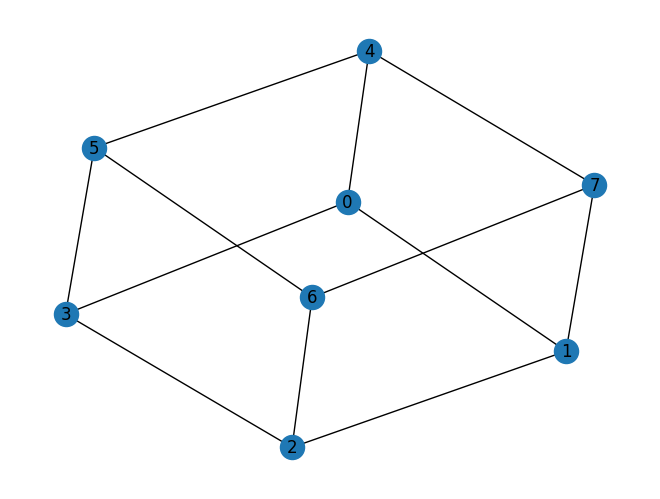

In [7]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)

In [11]:
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-28


In [12]:
# Objective function: maximize number of nodes
m.setObjective( gp.quicksum( x[i] * weights[i] for i in G.nodes ), GRB.MAXIMIZE )

# Add constraint for each edge
m.addConstrs( x[i] + x[j] <= 1 for i,j in G.edges )

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (3, 5): <gurobi.Constr *Awaiting Model Update*>,
 (4, 5): <gurobi.Constr *Awaiting Model Update*>,
 (4, 7): <gurobi.Constr *Awaiting Model Update*>,
 (5, 6): <gurobi.Constr *Awaiting Model Update*>,
 (6, 7): <gurobi.Constr *Awaiting Model Update*>}

In [13]:
# Solve
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 5500U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 12 rows, 8 columns and 24 nonzeros
Model fingerprint: 0x31a65d0e
Variable types: 0 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 165.0000000
Presolve removed 12 rows and 8 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 165 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.650000000000e+02, best bound 1.650000000000e+02, gap 0.0000%


In [14]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 165.0
Selected nodes: [0, 2, 5, 7]


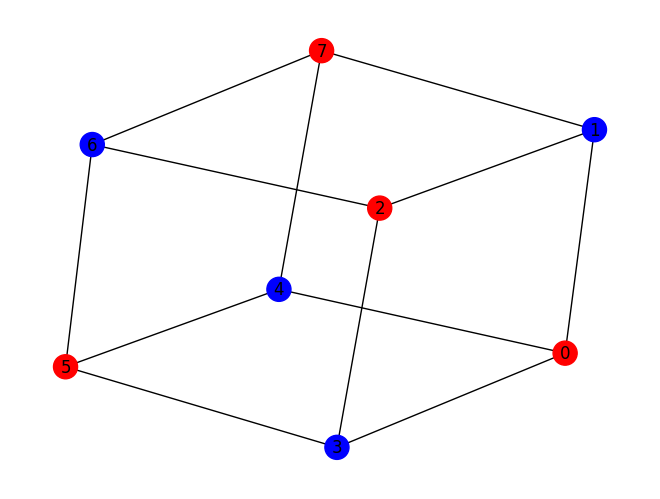

In [16]:
node_colors = [ "red" if i in selected_nodes else "blue" for i in G.nodes ]

nx.draw( G, with_labels=True, node_color=node_colors )